# Normal vs Leveraged Gains

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, Latex

# jt -t monokai -tfs 14 -ofs 11 -nfs 10 -dfs 12 -fs 11 -lineh 150
darkmode = False

# darkmode = True

## Gain Generator

The `gain_generator()` function produces a series of random daily gains. The default parameters produces a cummulative gain of 10% (`target = 1.1`) over 200 days (`count = 200`), with a daily standard deviation of 2% (`m = 0.02`). This closely resembles the SP-500. Users may also choose a uniform distribution by setting the keyword `normal` to `False`.

In [2]:
def gain_generator(target=1.1, count=200, m=0.02, verbose=0, normal=True):
    if normal:
        # Normally distributed numbers
        d = m * np.random.normal(size=count)
    else:
        # Uniform random numbers in between [-m, +m]
        d = 2.0 * m * np.random.random(count) - m
    # Force day 0 to be 0
    d[0]= 0.0
    # Find a gain that produces desired cumulative gain at the end of the period
    k = 0
    offset = 0;
    x = np.ones((count))
    while k < 20:
        x[1:] = 1.0 + d[1:] + offset
        ret = np.prod(x)
        delta = np.prod(x) - target
        if verbose:
            print('{:3d}  o = {:.6f} -> {:.6f}  {:+9.6f}'.format(k, offset, ret, delta))
        if abs(delta) < 1.0e-5:
            break
        offset -= 1.0 / count * delta
        k += 1
    return x - 1.0

In [3]:
# g = gain_generator()
# np.std(g)

In [4]:
fs = 0.5
if darkmode:
    edgecolor = 'white'
    facecolor = (1, 1, 1, 0.1)
    green_edge = '#99ff99'
    red_edge = '#ff9999'
    clr1 = '#4396f6'
    clr2 = '#a6e22e'
else:
    edgecolor = 'black'
    facecolor = (0, 0, 0, 0.05)
    green_edge = '#004400'
    red_edge = '#440000'
    clr1 = '#4396f6'
    clr2 = '#33aa00'

context_properties = {
    'font.family': 'sans-serif',
    'figure.frameon': False,
    'figure.facecolor': (0, 0, 0, 0),
    'axes.edgecolor': edgecolor,
    'axes.facecolor': facecolor,
    'axes.labelcolor': edgecolor,
    'axes.linewidth': 1.0 * fs,
    'axes.titlepad': 14.0,
    'axes.xmargin': 0,
    'axes.ymargin': 0,
    'grid.color': edgecolor,
    'hatch.color': edgecolor,
    'patch.edgecolor': edgecolor,
    'text.color': edgecolor,
    'xtick.color': edgecolor,
    'xtick.direction': 'in',
    'xtick.major.pad': 9.0 * fs,
    'xtick.major.size': 4.0 * fs,
    'xtick.major.width': 1.0 * fs,
    'ytick.color': edgecolor,
    'ytick.direction': 'in',
    'ytick.major.pad': 9.0 * fs,
    'grid.color': edgecolor,
    'grid.alpha': 0.1,
    'legend.frameon': False,
    'legend.framealpha': 0.15,
}
plt.rcParams['font.sans-serif'] = 'Arial'

## Simulation

This simulation emulates a random daily return with the targeted compound gain and a 3x leveraged return

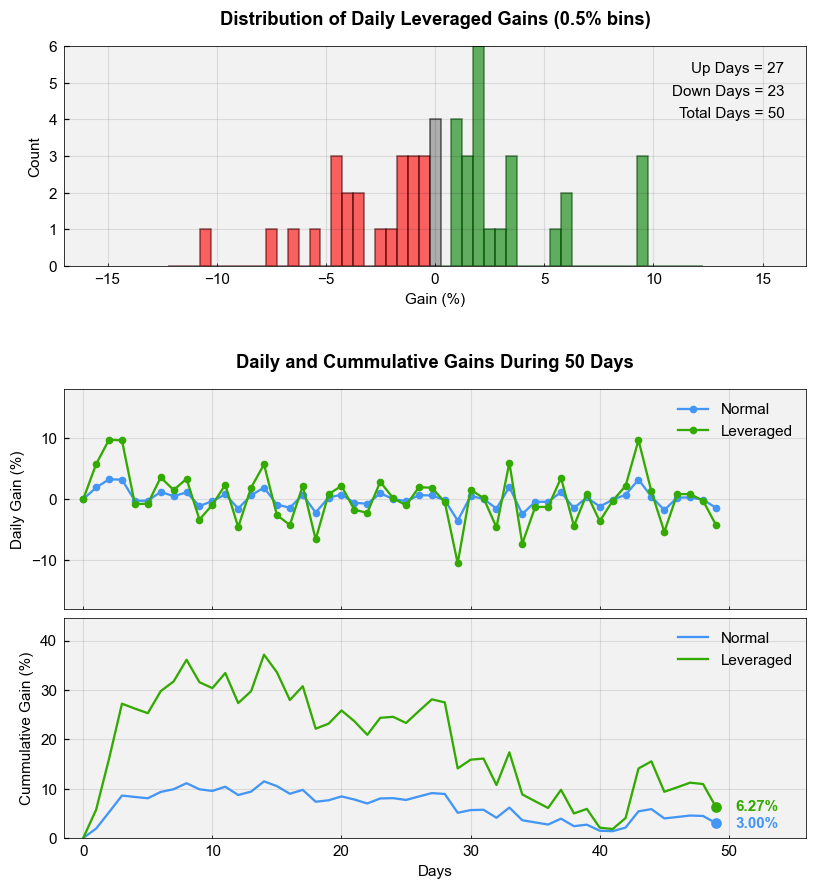

In [5]:
# For a typical growth, low volatility, e.g., SPY, daily fluction can be higher
# m = 0.01; gain = 1.1; count = 200

# For high growth, high volatility, e.g., TQQQ, daily fluction can be higher
# m = 0.017; gain = 1.08; count = 100
m = 0.017; gain = 1.03; count = 50
# m = 0.017; gain = 1.04; count = 25
# m = 0.017; gain = 1.01; count = 80

# Simulation
g = gain_generator(gain, count=count, m=m)
t = np.arange(count)
n = np.prod(1.0 + g)
l = np.prod(1.0 + 3.0 * g)
cn = 100 * (np.cumprod(1 + g) - 1)
cl = 100 * (np.cumprod(1 + 3.0 * g) - 1)
markersize = 8
delta = 0.5

with plt.rc_context(context_properties):
    # Distribution of the Gains
    fig = plt.figure(dpi=110, figsize=(7.5, 8))
    fig.add_axes((0.05, 0.7, 0.9, 0.25))
    b = np.arange(-12 - 0.5 * delta, 12 + delta, delta)
    n, _, patches = plt.hist(300 * g, bins=b, alpha=0.6)
    for b, p in zip(b, patches):
        if b < -0.5 * delta:
            p.set_facecolor('red')
            p.set_edgecolor(red_edge)
        elif b < 0.5 * delta:
            p.set_facecolor('grey')
            p.set_edgecolor(edgecolor)
        else:
            p.set_facecolor('green')
            p.set_edgecolor(green_edge)
    plt.text(16, 0.93 * max(n), 'Up Days = {}\nDown Days = {}\nTotal Days = {}'.format(
        np.sum(g >= 0), np.sum(g < 0), count), linespacing=1.8, va='top', ha='right')
    plt.grid()
    plt.xlim((-17, 17))
    plt.xlabel('Gain (%)')
    plt.ylabel('Count')
    plt.title('Distribution of Daily Leveraged Gains ({:.1f}% bins)'.format(delta), fontweight=800)

    # Raw Gain Values
    ax = plt.axes((0.05, 0.31, 0.9, 0.25))
    if len(t) <= 50:
        marker = '.'
    else:
        marker = ''
    ax.plot(t, 100.0 * g, marker=marker, markersize=markersize, color=clr1, label='Normal')
    ax.plot(t, 300.0 * g, marker=marker, markersize=markersize, color=clr2, label='Leveraged')
    ax.set_xlim((-0.03 * count, 1.12 * count))
    ax.set_ylim((-18, 18))
    ax.legend()
    ax.grid()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels([''] * len(labels))
    ax.set_ylabel('Daily Gain (%)')
    ax.set_title('Daily and Cummulative Gains During {} Days'.format(count), fontweight=800)

    # Cumulative Gain Over the Period
    ax = fig.add_axes((0.05, 0.05, 0.9, 0.25))
    ax.plot(t, cn, label='Normal', color=clr1)
    ax.plot(t, cl, label='Leveraged', color=clr2)
    ax.plot(t[-1], cn[-1], marker='o', color=clr1)
    ax.text(t[-1] * 1.03, cn[-1], '{:.2f}%'.format(cn[-1]), color=clr1, va='center', fontweight=600)
    ax.plot(t[-1], cl[-1], marker='o', color=clr2)
    ax.text(t[-1] * 1.03, cl[-1], '{:.2f}%'.format(cl[-1]), color=clr2, va='center', fontweight=600)
    ax.set_xlim((-0.03 * count, 1.12 * count))
    ax.set_ylim((1.2 * np.min(cl), 1.2 * np.max(cl)))
    ax.legend(loc='best')
    ax.grid()
    ax.set_xlabel('Days')
    ax.set_ylabel('Cummulative Gain (%)')

print('')

In [6]:
plt.close()

## Multiple Realizations

In [7]:
# Number of realizations
r = 20

# Table header
output  = '| \# | Up Days | Normal Return | Leveraged Return | Extremes | Better? |\n'
output += '| --: | --: | :-: | :-: | --: | :-: |\n'

# Now we emulate a bunch of runs
uu = 0
nn = 0
ll = 0
ee = (0, 0)
lab = {True: '+', False: '-'}
for k in range(1, r + 1):
    g = gain_generator(gain, count, m=m)
    u = np.sum(g >= 0)
    n = np.prod(1.0 + g)
    l = np.prod(1.0 + 3.0 * g)
    h = np.cumprod(1.0 + 3.0 * g)
    e = [100 * (x - 1) for x in (np.min(h), np.max(h))]
    ee = (min(ee[0], e[0]), max(ee[1], e[1]))
    uu += u
    nn += n
    ll += l
    output += '| {} | {:3d} ({:.1f}%) | {:+.2f}% | {:+.2f}% | {:+.1f}%, {:+.1f}% | {} |\n'.format(
        k, u, 100 * u / count, 100 * (n - 1.0), 100 * (l - 1.0), e[0], e[1], lab[l > n])
nn /= r
ll /= r

output += '||\n'
output += '| **Average** | **{:.1f} ({:.1f}%)** | **{:+.2f}%** | **{:+.2f}%** | **{:+5.1f}%, {:+5.1f}%** | **{}** |\n'.format(
    uu / r, 100 * uu / count / r, 100 * (nn - 1), 100 * (ll - 1), ee[0], ee[1], lab[ll > nn])

display(Markdown(output))

| \# | Up Days | Normal Return | Leveraged Return | Extremes | Better? |
| --: | --: | :-: | :-: | --: | :-: |
| 1 |  27 (54.0%) | +3.00% | +4.01% | -18.0%, +18.7% | + |
| 2 |  26 (52.0%) | +3.00% | +6.12% | -9.5%, +14.6% | + |
| 3 |  27 (54.0%) | +3.00% | +5.02% | +0.0%, +65.7% | + |
| 4 |  23 (46.0%) | +3.00% | +6.03% | -7.9%, +13.8% | + |
| 5 |  30 (60.0%) | +3.00% | +4.84% | -21.5%, +12.8% | + |
| 6 |  27 (54.0%) | +3.00% | +4.50% | -26.6%, +13.6% | + |
| 7 |  24 (48.0%) | +3.00% | +6.12% | -16.9%, +10.0% | + |
| 8 |  26 (52.0%) | +3.00% | +5.05% | -18.8%, +15.2% | + |
| 9 |  27 (54.0%) | +3.00% | +4.13% | -13.3%, +28.5% | + |
| 10 |  26 (52.0%) | +3.00% | +5.46% | -16.2%, +15.7% | + |
| 11 |  25 (50.0%) | +3.00% | +5.39% | -26.1%, +5.4% | + |
| 12 |  26 (52.0%) | +3.00% | +5.52% | -6.2%, +34.2% | + |
| 13 |  31 (62.0%) | +3.00% | +4.57% | -18.6%, +12.6% | + |
| 14 |  25 (50.0%) | +3.00% | +6.09% | -12.4%, +22.0% | + |
| 15 |  31 (62.0%) | +3.00% | +3.78% | -13.6%, +39.0% | + |
| 16 |  27 (54.0%) | +3.00% | +4.96% | -13.7%, +43.4% | + |
| 17 |  26 (52.0%) | +3.00% | +3.85% | -5.7%, +30.0% | + |
| 18 |  25 (50.0%) | +3.00% | +5.08% | +0.0%, +52.7% | + |
| 19 |  26 (52.0%) | +3.00% | +4.99% | -24.9%, +5.0% | + |
| 20 |  26 (52.0%) | +3.00% | +3.46% | -0.7%, +33.9% | + |
||
| **Average** | **26.6 (53.1%)** | **+3.00%** | **+4.95%** | **-26.6%, +65.7%** | **+** |
